In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:

img = cv2.imread('eceerdinc\\bollywood_celeb_faces2\\Randeep_Hooda\\1.jpg')
img.shape

(703, 567, 3)

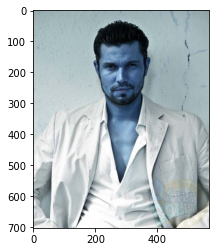

In [5]:
plt.imshow(img)

In [6]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(703, 567)

In [7]:
gray

array([[171, 161, 163, ..., 157, 158, 159],
       [167, 156, 158, ..., 157, 158, 159],
       [163, 151, 152, ..., 158, 158, 160],
       ...,
       [217, 234, 255, ..., 207, 200, 207],
       [238, 250, 248, ..., 195, 223, 246],
       [245, 255, 240, ..., 235, 248, 244]], dtype=uint8)

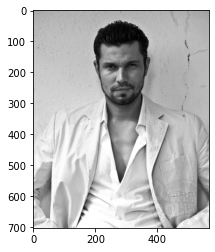

In [8]:
plt.imshow(gray, cmap='gray')

In [9]:
face_cascade = cv2.CascadeClassifier(r'eceerdinc\\haarcascades (1)\\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'eceerdinc\\haarcascades (1)\\haarcascade_eye.xml')



In [10]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[194, 113, 185, 185]], dtype=int32)

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(194, 113, 185, 185)

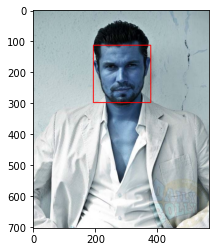

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

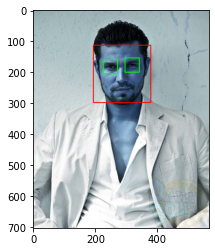

In [13]:

cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

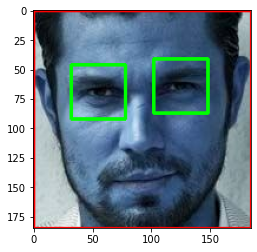

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    try:
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color
    except:
        return None

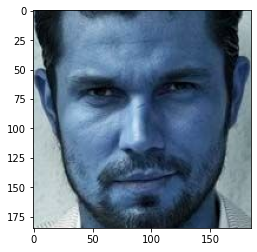

In [16]:

cropped_image = get_cropped_image_if_2_eyes('eceerdinc\\bollywood_celeb_faces2\\Randeep_Hooda\\1.jpg')
plt.imshow(cropped_image)

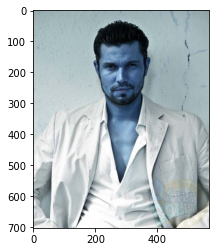

In [17]:
org_image_obstructed = cv2.imread(r'eceerdinc\\bollywood_celeb_faces2\\Randeep_Hooda\\1.jpg')
plt.imshow(org_image_obstructed)

In [18]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r'eceerdinc\\bollywood_celeb_faces2\\Randeep_Hooda\\1.jpg')
cropped_image_no_2_eyes

array([[[191, 206, 215],
        [ 77,  92, 101],
        [ 10,  21,  29],
        ...,
        [177, 196, 199],
        [177, 196, 199],
        [178, 199, 201]],

       [[190, 205, 214],
        [ 93, 108, 117],
        [ 18,  29,  37],
        ...,
        [173, 192, 195],
        [176, 195, 198],
        [178, 199, 201]],

       [[193, 208, 217],
        [ 99, 114, 123],
        [ 21,  32,  40],
        ...,
        [171, 190, 193],
        [175, 194, 197],
        [178, 199, 201]],

       ...,

       [[205, 218, 216],
        [207, 220, 218],
        [206, 219, 217],
        ...,
        [124, 139, 142],
        [121, 136, 139],
        [123, 138, 141]],

       [[186, 197, 195],
        [222, 233, 231],
        [215, 226, 224],
        ...,
        [151, 166, 169],
        [134, 149, 152],
        [125, 140, 143]],

       [[179, 187, 186],
        [191, 202, 200],
        [225, 233, 232],
        ...,
        [138, 153, 156],
        [131, 146, 149],
        [131, 146, 149]]

In [19]:
cropped_image_no_2_eyes.shape

(185, 185, 3)

In [20]:
path_to_data = "eceerdinc\\bollywood_celeb_faces2"
path_to_cr_data ="eceerdinc\\croppedversion2aa"

In [21]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        if "cropped" not in entry.path:
            img_dirs.append(entry.path)

In [22]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [23]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = 1
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        
        if roi_color is not None:
            #print(roi_color.shape)
            cropped_folder = path_to_cr_data + "\\" + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            if cropped_folder not in cropped_image_dirs:
                cropped_image_dirs.append(cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  eceerdinc\croppedversion2aa\Randeep_Hooda
Generating cropped images in folder:  eceerdinc\croppedversion2aa\Rani_Mukerji
Generating cropped images in folder:  eceerdinc\croppedversion2aa\Ranveer_Singh
Generating cropped images in folder:  eceerdinc\croppedversion2aa\Richa_Chadda
Generating cropped images in folder:  eceerdinc\croppedversion2aa\Riteish_Deshmukh
Generating cropped images in folder:  eceerdinc\croppedversion2aa\Saif_Ali_Khan
Generating cropped images in folder:  eceerdinc\croppedversion2aa\Salman_Khan
Generating cropped images in folder:  eceerdinc\croppedversion2aa\Sanjay_Dutt
Generating cropped images in folder:  eceerdinc\croppedversion2aa\Sara_Ali_Khan
Generating cropped images in folder:  eceerdinc\croppedversion2aa\Shahid_Kapoor
Generating cropped images in folder:  eceerdinc\croppedversion2aa\Shah_Rukh_Khan
Generating cropped images in folder:  eceerdinc\croppedversion2aa\Shilpa_Shetty
Generating cropped images in folder:  ecee

In [38]:
!pip install PyWavelets

  Using cached PyWavelets-1.1.1-cp38-cp38-win_amd64.whl (4.3 MB)


In [24]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

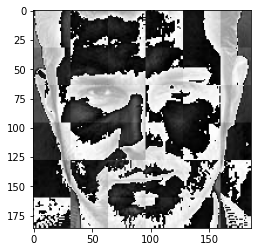

In [25]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [26]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list


In [27]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1


In [28]:

X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [29]:
len(X[0])

4096

In [30]:
len(X)

2983

In [31]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(2983, 4096)

In [32]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.43967828418230565

In [103]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [104]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [105]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score                             best_params
0                  svm    0.480564  {'svc__C': 1, 'svc__kernel': 'linear'}
1  logistic_regression    0.402769            {'logisticregression__C': 1}

In [106]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [107]:

best_estimators['svm'].score(X_test,y_test)

0.4718498659517426

In [108]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.37667560321715815

In [109]:
best_clf = best_estimators['svm']

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  0,  0, ...,  0,  0,  0],
       [ 0, 14,  0, ...,  0,  0,  1],
       [ 0,  1, 13, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  7,  0,  0],
       [ 0,  0,  0, ...,  0, 11,  0],
       [ 0,  0,  0, ...,  0,  0, 13]], dtype=int64)

Text(69.0, 0.5, 'Truth')

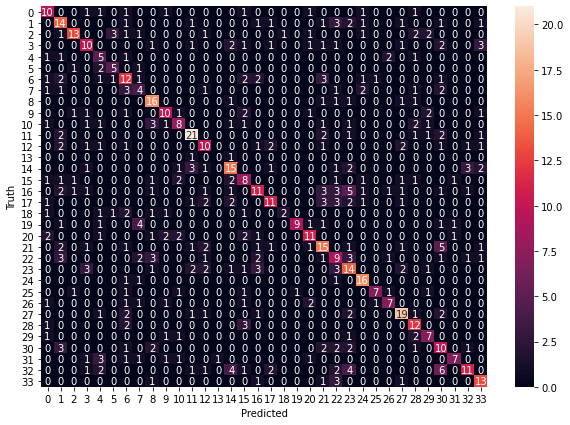

In [111]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [112]:
print(classification_report(y_test, best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.45      0.56      0.50        18
           1       0.40      0.50      0.44        28
           2       0.72      0.48      0.58        27
           3       0.45      0.40      0.43        25
           4       0.25      0.45      0.32        11
           5       0.50      0.56      0.53         9
           6       0.36      0.43      0.39        28
           7       0.25      0.25      0.25        16
           8       0.52      0.73      0.60        22
           9       0.56      0.50      0.53        20
          10       0.47      0.36      0.41        22
          11       0.64      0.68      0.66        31
          12       0.43      0.42      0.43        24
          13       0.00      0.00      0.00         2
          14       0.50      0.50      0.50        30
          15       0.32      0.38      0.35        21
          16       0.46      0.32      0.38        34
          17       0.58    

In [113]:
best_clf = best_estimators['logistic_regression']

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  1,  0, ...,  0,  0,  2],
       [ 0, 12,  1, ...,  0,  1,  1],
       [ 0,  2,  7, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  5,  0,  3],
       [ 0,  2,  0, ...,  0,  9,  0],
       [ 0,  0,  0, ...,  0,  1, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

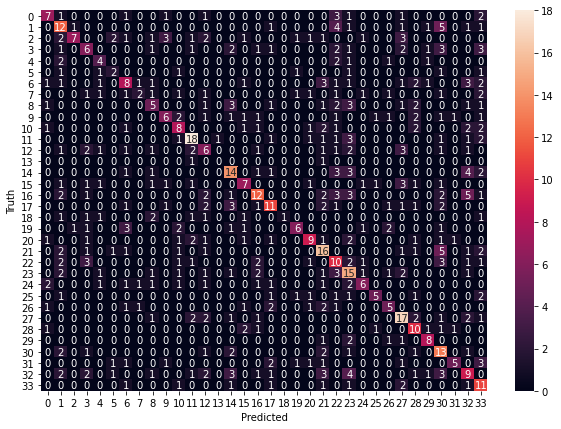

In [115]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [116]:
print(classification_report(y_test, best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.47      0.39      0.42        18
           1       0.33      0.43      0.38        28
           2       0.78      0.26      0.39        27
           3       0.29      0.24      0.26        25
           4       0.33      0.36      0.35        11
           5       0.29      0.22      0.25         9
           6       0.35      0.29      0.31        28
           7       0.40      0.12      0.19        16
           8       0.28      0.23      0.25        22
           9       0.46      0.30      0.36        20
          10       0.38      0.36      0.37        22
          11       0.58      0.58      0.58        31
          12       0.23      0.25      0.24        24
          13       0.00      0.00      0.00         2
          14       0.42      0.47      0.44        30
          15       0.41      0.33      0.37        21
          16       0.46      0.35      0.40        34
          17       0.44    

# LDA

In [118]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [119]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=1)

In [120]:
lda.score(X_test,y_test)

0.23726541554959785

# Eigen Faces

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [154]:
Eig_X, Eig_y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (64, 64))
        grayscale_img = cv2.cvtColor(scalled_raw_img, cv2.COLOR_BGR2GRAY)
        Eig_X.append(grayscale_img)
        Eig_y.append(class_dict[celebrity_name])

In [155]:
arr = np.array(Eig_X)
arr.shape


(2983, 64, 64)

In [156]:
Eig_X_train, Eig_X_test, Eig_y_train, Eig_y_test = train_test_split(Eig_X, Eig_y, random_state=0)


In [157]:
arr = np.array(Eig_X_test)
arr.shape

(746, 64, 64)

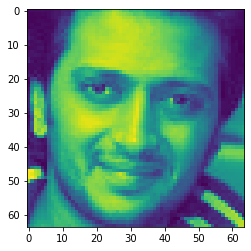

In [111]:
plt.imshow(Eig_X_train[1])

In [112]:
eigen_model = cv2.face.EigenFaceRecognizer_create()
eigen_model.train(Eig_X_train, np.array(Eig_y_train))

In [ ]:
correct = 0
Eig_y_pred = []
for idx, img in enumerate(Eig_X_test):
    #print(idx)
    pred = eigen_model.predict(img)
    #print(Eig_y_test[idx])
    if pred[0] == Eig_y_test[idx]:
        correct += 1
    Eig_y_pred.append(pred[0])

In [127]:
accuracy = correct/len(Eig_y_test)
print("Accuracy:", accuracy)

Accuracy: 0.30294906166219837


In [128]:
cm = confusion_matrix(Eig_y_test, Eig_y_pred)

Text(69.0, 0.5, 'Truth')

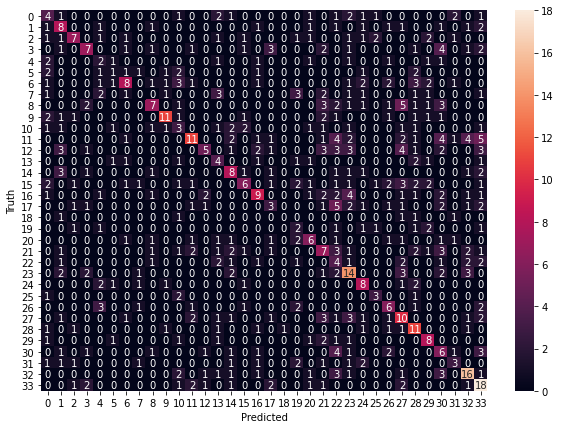

In [129]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# LBPH

In [158]:
LBPH_model = cv2.face.LBPHFaceRecognizer_create()
LBPH_model.train(Eig_X_train, np.array(Eig_y_train))

In [159]:
correct = 0
Eig_y_pred = []
for idx, img in enumerate(Eig_X_test):
    pred = LBPH_model.predict(img)
    
    if pred[0] == Eig_y_test[idx]:
        correct += 1
    Eig_y_pred.append(pred[0])

In [160]:
accuracy = correct/len(Eig_y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5428954423592494


In [139]:
cm = confusion_matrix(Eig_y_test, Eig_y_pred)

Text(69.0, 0.5, 'Truth')

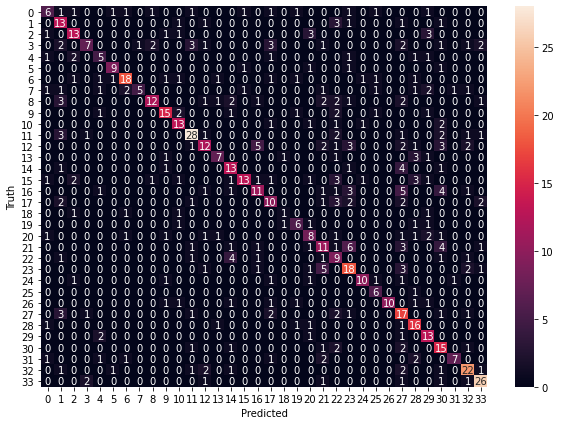

In [140]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [141]:
print(classification_report(Eig_y_test, Eig_y_pred))

              precision    recall  f1-score   support

           0       0.46      0.33      0.39        18
           1       0.42      0.62      0.50        21
           2       0.62      0.59      0.60        22
           3       0.64      0.27      0.38        26
           4       0.42      0.42      0.42        12
           5       0.75      0.69      0.72        13
           6       0.75      0.62      0.68        29
           7       0.83      0.28      0.42        18
           8       0.75      0.43      0.55        28
           9       0.68      0.62      0.65        24
          10       0.59      0.68      0.63        19
          11       0.72      0.70      0.71        40
          12       0.55      0.38      0.44        32
          13       0.64      0.50      0.56        14
          14       0.50      0.62      0.55        21
          15       0.81      0.43      0.57        30
          16       0.52      0.38      0.44        29
          17       0.43    

| Algorithm Name | Accuracy |
| --- | --- |
| Support Vector Machine | 47.18% |
| Logistic Regression | 37.66% |
| Eigen Faces | 30.29% |
| Local Binary Pattern Histogram | 54.28% |
| CNN | 53% |

# CNN VGG 16

In [135]:
Eig_X, Eig_y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        #scalled_raw_img = cv2.resize(img, (64,64))
        scalled_raw_img = cv2.resize(img, (200,200))
        #grayscale_img = cv2.cvtColor(scalled_raw_img, cv2.COLOR_BGR2GRAY)
        #Eig_X.append(grayscale_img)
        Eig_X.append(scalled_raw_img)
        Eig_y.append(class_dict[celebrity_name])


In [136]:
Eig_X_train, Eig_X_test, Eig_y_train, Eig_y_test = train_test_split(Eig_X, Eig_y, random_state=0)

In [137]:
#from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout
from keras.layers import Dense, Flatten, Activation
from keras.applications.vgg16 import VGG16

In [138]:
vgg = VGG16(include_top=False, weights='imagenet', input_shape=(200,200,3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [139]:
for layer in vgg.layers:
    layer.trainable=False

In [140]:
from keras.models import Model
x = Flatten()(vgg.output)
x = Dense(512,activation='relu')(x)
x = Dense(512,activation='relu')(x)
prediction = Dense(34,activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0   

In [141]:

model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

Eig_X_train=np.array(Eig_X_train)
Eig_y_train=np.array(Eig_y_train)
Eig_X_test=np.array(Eig_X_test)
Eig_y_test=np.array(Eig_y_test)



In [142]:
history=model.fit(Eig_X_train,Eig_y_train, validation_data=(Eig_X_test,Eig_y_test),batch_size=16, epochs=25)

Epoch 1/25
140/140 [==============================] - 376s 3s/step - loss: 6.1313 - accuracy: 0.1627 - val_loss: 2.7962 - val_accuracy: 0.2895
Epoch 2/25
140/140 [==============================] - 372s 3s/step - loss: 1.6571 - accuracy: 0.5704 - val_loss: 2.8847 - val_accuracy: 0.3941
Epoch 3/25
140/140 [==============================] - 375s 3s/step - loss: 0.8937 - accuracy: 0.7658 - val_loss: 3.2553 - val_accuracy: 0.4209
Epoch 4/25
140/140 [==============================] - 5701s 41s/step - loss: 0.5327 - accuracy: 0.8722 - val_loss: 3.3699 - val_accuracy: 0.4759
Epoch 5/25
140/140 [==============================] - 205s 1s/step - loss: 0.4740 - accuracy: 0.8891 - val_loss: 3.8465 - val_accuracy: 0.4665
Epoch 6/25
140/140 [==============================] - 202s 1s/step - loss: 0.4610 - accuracy: 0.8882 - val_loss: 5.3533 - val_accuracy: 0.4196
Epoch 7/25
140/140 [==============================] - 214s 2s/step - loss: 0.6128 - accuracy: 0.8905 - val_loss: 4.4795 - val_accuracy: 0.49

In [143]:
correct = 0
Eig_y_pred = []
for idx, img in enumerate(Eig_X_test):
   
    img = np.reshape(img,[1,200,200,3])
    
    pred = model.predict(img)
    
    
    arg=np.argmax(pred[0])
    
    if arg == Eig_y_test[idx]:
        correct += 1
    Eig_y_pred.append(arg)


In [144]:
accuracy = correct/len(Eig_y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5361930294906166


Text(69.0, 0.5, 'Truth')

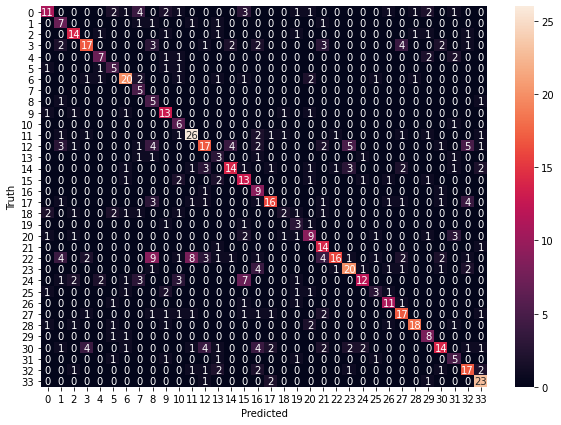

In [147]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(Eig_y_pred, Eig_y_test)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [148]:
print(classification_report(Eig_y_test, Eig_y_pred))

              precision    recall  f1-score   support

           0       0.35      0.61      0.45        18
           1       0.58      0.33      0.42        21
           2       0.67      0.64      0.65        22
           3       0.46      0.65      0.54        26
           4       0.54      0.58      0.56        12
           5       0.56      0.38      0.45        13
           6       0.65      0.69      0.67        29
           7       1.00      0.28      0.43        18
           8       0.71      0.18      0.29        28
           9       0.72      0.54      0.62        24
          10       0.86      0.32      0.46        19
          11       0.70      0.65      0.68        40
          12       0.37      0.53      0.44        32
          13       0.38      0.21      0.27        14
          14       0.45      0.67      0.54        21
          15       0.59      0.43      0.50        30
          16       0.82      0.31      0.45        29
          17       0.52    

# Testing

In [149]:
label_dict = {}
for key in class_dict:
    val = class_dict[key]
    label_dict[val] = key.split("\\")[-1]
label_dict    

{0: 'Randeep_Hooda',
 1: 'Rani_Mukerji',
 2: 'Ranveer_Singh',
 3: 'Richa_Chadda',
 4: 'Riteish_Deshmukh',
 5: 'Saif_Ali_Khan',
 6: 'Salman_Khan',
 7: 'Sanjay_Dutt',
 8: 'Sara_Ali_Khan',
 9: 'Shahid_Kapoor',
 10: 'Shah_Rukh_Khan',
 11: 'Shilpa_Shetty',
 12: 'Shraddha_Kapoor',
 13: 'Shreyas_Talpade',
 14: 'Shruti_Haasan',
 15: 'Sidharth_Malhotra',
 16: 'Sonakshi_Sinha',
 17: 'Sonam_Kapoor',
 18: 'Suniel_Shetty',
 19: 'Sunny_Deol',
 20: 'Sushant_Singh_Rajput',
 21: 'Taapsee_Pannu',
 22: 'Tabu',
 23: 'Tamannaah_Bhatia',
 24: 'Tiger_Shroff',
 25: 'Tusshar_Kapoor',
 26: 'Uday_Chopra',
 27: 'Vaani_Kapoor',
 28: 'Varun_Dhawan',
 29: 'Vicky_Kaushal',
 30: 'Vidya_Balan',
 31: 'Vivek_Oberoi',
 32: 'Yami_Gautam',
 33: 'Zareen_Khan'}

In [150]:
def getFaceRegion(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    faceCoords = []
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            faceCoords.append([x,y,w,h])
    return faceCoords

## LBPH Prediction

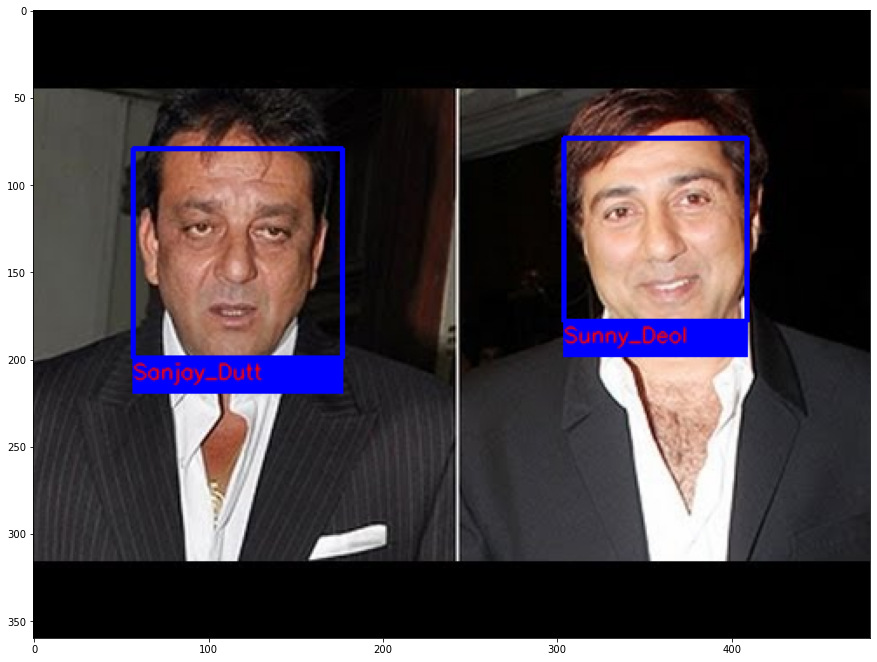

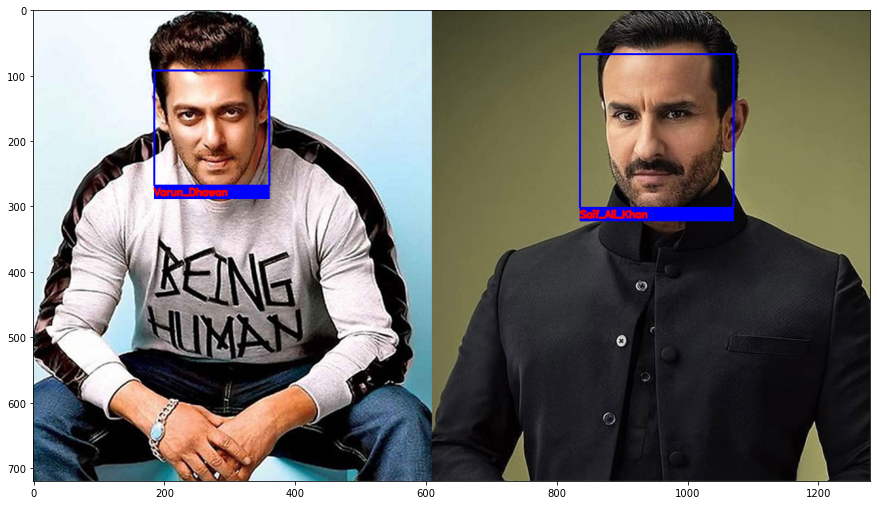

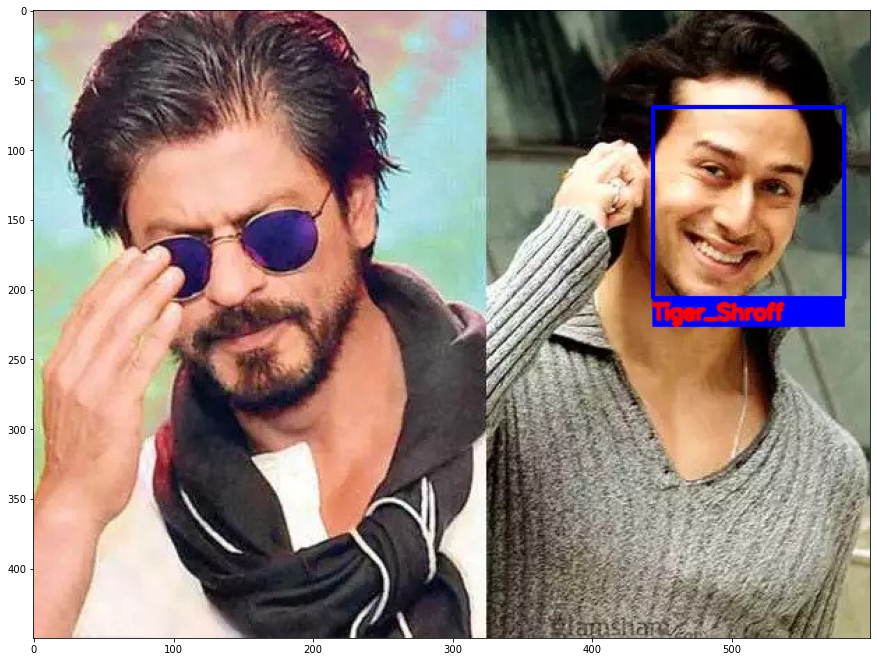

In [171]:
test1 = cv2.imread("eceerdinc\\testimages\\sajaydatt&sunnydeol.jpg")
plt.figure(figsize=(15,15))
faceCoords = getFaceRegion(test1)
for coord in faceCoords:
    x, y, w, h = coord[0], coord[1], coord[2], coord[3]
    cv2.rectangle(test1, (x, y), (x+w, y+h), (255,0,0), 2)
    cropped = test1[y:y+h, x:x+h]
    cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
    cropped = cv2.resize(cropped, (64, 64))
    pred = LBPH_model.predict(cropped)
    predictedName = label_dict[pred[0]]
    cv2.rectangle(test1, (x, y+h), (x+w, y+h+20), (255,0,0), -1)
    cv2.putText(test1, predictedName, (x, y+h+12), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255), 1, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(test1, cv2.COLOR_BGR2RGB))

test2 = cv2.imread("eceerdinc\\testimages\\saf_sal.jpg")
plt.figure(figsize=(15,15))
faceCoords = getFaceRegion(test2)
for coord in faceCoords:
    x, y, w, h = coord[0], coord[1], coord[2], coord[3]
    cv2.rectangle(test2, (x, y), (x+w, y+h), (255,0,0), 2)
    cropped = test2[y:y+h, x:x+h]
    cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
    cropped = cv2.resize(cropped, (64, 64))
    pred = LBPH_model.predict(cropped)
    predictedName = label_dict[pred[0]]
    cv2.rectangle(test2, (x, y+h), (x+w, y+h+20), (255,0,0), -1)
    cv2.putText(test2, predictedName, (x, y+h+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(test2, cv2.COLOR_BGR2RGB))

test3 = cv2.imread("eceerdinc\\testimages\\srk_shr.jpg")
plt.figure(figsize=(15,15))
faceCoords = getFaceRegion(test3)
for coord in faceCoords:
    x, y, w, h = coord[0], coord[1], coord[2], coord[3]
    cv2.rectangle(test3, (x, y), (x+w, y+h), (255,0,0), 2)
    cropped = test3[y:y+h, x:x+h]
    cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
    cropped = cv2.resize(cropped, (64, 64))
    pred = LBPH_model.predict(cropped)
    predictedName = label_dict[pred[0]]
    cv2.rectangle(test3, (x, y+h), (x+w, y+h+20), (255,0,0), -1)
    cv2.putText(test3, predictedName, (x, y+h+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2, cv2.LINE_AA)
    
plt.imshow(cv2.cvtColor(test3, cv2.COLOR_BGR2RGB))

#CNN

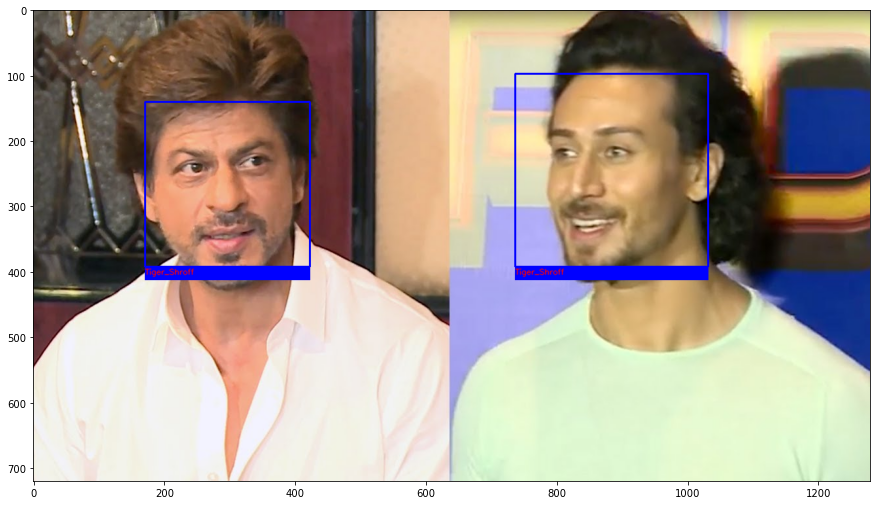

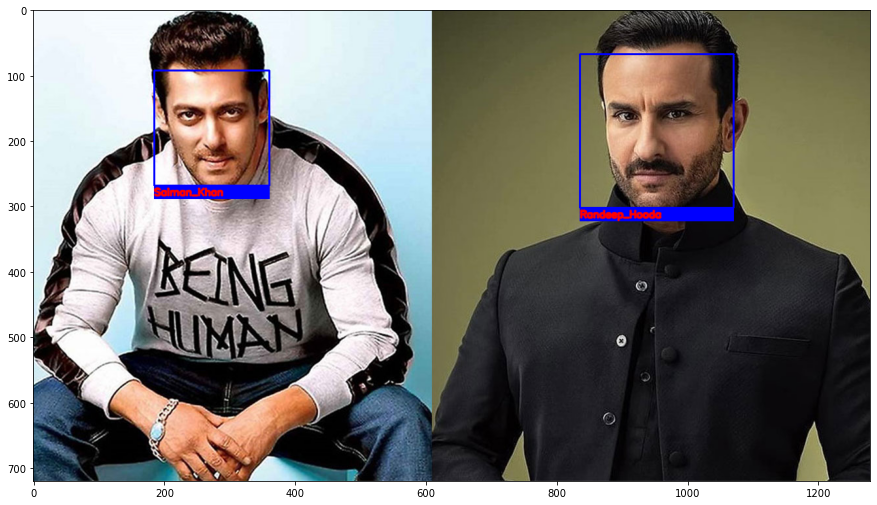

In [189]:
test1 = cv2.imread("eceerdinc\\testimages\\srk&shh.jpg")
plt.figure(figsize=(15,15))
faceCoords = getFaceRegion(test1)
for coord in faceCoords:
    x, y, w, h = coord[0], coord[1], coord[2], coord[3]
    cv2.rectangle(test1, (x, y), (x+w, y+h), (255,0,0), 2)
    cropped = test1[y:y+h, x:x+h]
    #cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
    cropped = cv2.resize(cropped, (200,200))
    cropped = np.reshape(cropped,[1,200,200,3])
    pred = model.predict(cropped)
    arg=np.argmax(pred[0])
    predictedName = label_dict[arg]
    cv2.rectangle(test1, (x, y+h), (x+w, y+h+20), (255,0,0), -1)
    cv2.putText(test1, predictedName, (x, y+h+12), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,255), 1, cv2.LINE_AA)
plt.imshow(cv2.cvtColor(test1, cv2.COLOR_BGR2RGB))

test2 = cv2.imread("eceerdinc\\testimages\\saf_sal.jpg")
plt.figure(figsize=(15,15))
faceCoords = getFaceRegion(test2)
for coord in faceCoords:
    x, y, w, h = coord[0], coord[1], coord[2], coord[3]
    cv2.rectangle(test2, (x, y), (x+w, y+h), (255,0,0), 2)
    cropped = test2[y:y+h, x:x+h]
    cropped = cv2.resize(cropped, (200,200))
    cropped = np.reshape(cropped,[1,200,200,3])
    pred = model.predict(cropped)
    arg=np.argmax(pred[0])
    predictedName = label_dict[arg]
    cv2.rectangle(test2, (x, y+h), (x+w, y+h+20), (255,0,0), -1)
    cv2.putText(test2, predictedName, (x, y+h+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(test2, cv2.COLOR_BGR2RGB))

